In [1]:
from pysead.Frame_2D import Frame_2D
from pysead.Frame_2D import Member_2D
import numpy as np

Positive Values for forces: right, up (righthand rule)
Negative moment = clockwise, Positive moment = counter-clockwise (righthand rule)
For adding Local Member Load: Axial Load is always parallel to the member local axis
For adding Local Member Load: Loading is always point downward towards the frame element and is considered positive
Member Forces: at left end to right end (based on local axis) - [Axial, Shear, Bending]. Local Axis is governed for positive/negative values. Right is positive, upward is positive, counterclockwise is positive
Frame Reactions: [horizontal, vertical, Moment]. horizontal - right is positive, vertical - upward is positive, moment - counterclockwise is positive
Frame Moment Release: All elements that is connected to the same release node should be released at node end of the element


In [2]:
M1 = Member_2D(member_number = 1,
               nodes = {1:[0,0], 3:[0,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M2 = Member_2D(member_number = 2,
               nodes = {2:[9,0], 5:[9,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M3 = Member_2D(member_number = 3,
               nodes = {3:[0,6], 4:[0,12]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M4 = Member_2D(member_number = 4,
               nodes = {3:[0,6], 5:[9,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M5 = Member_2D(member_number = 5,
               nodes = {4:[0,12], 5:[9,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M5.Add_Load_Full_Uniform(-12)
Frame_3 = Frame_2D()
Frame_3.Compile_Frame_Member_Properties([M1,M2,M3,M4,M5])
Frame_3.supports = {1:[1,1,1], 2:[1,1,1]}
Frame_3.Add_Load_Node({3:[80,0,0], 4:[40,0,0]})
Frame_3.Solve()

In [3]:
Frame_3.displacements_

{1: [0.0, 0.0, 0.0],
 2: [0.0, 0.0, 0.0],
 3: [0.18542365276311096, 0.0004187389471646133, -0.017619874705581406],
 4: [0.186623367623509, 0.0007136698961752079, 0.017891195648726946],
 5: [0.18552141388617183, -0.00013073894716461473, -0.026028480844180656]}

In [4]:
Frame_3.local_member_forces

{1: array([0, 0, 0, 0, 0, 0]),
 2: array([0, 0, 0, 0, 0, 0]),
 3: array([0, 0, 0, 0, 0, 0]),
 4: array([0, 0, 0, 0, 0, 0]),
 5: array([   0.        ,  -64.89992296, -117.        ,    0.        ,
         -64.89992296,  117.        ])}

In [5]:
Frame_3.solved_member_forces

{1: array([-157.02710519,  106.05122292,  360.44136804,  157.02710519,
        -106.05122292,  275.86596946]),
 2: array([ 49.02710519,  85.94877708, 320.31468527, -49.02710519,
        -85.94877708, 195.37797722]),
 3: array([-110.59910588,    1.61094215,  -80.39374239,  110.59910588,
          -1.61094215,   90.05939531]),
 4: array([ -24.44028077,  -46.42799931, -195.47222706,   24.44028077,
          46.42799931, -222.37976671]),
 5: array([ 93.29097262,  -5.82967772,  26.94060469, -93.29097262,
          5.82967772, -89.99821052])}

In [6]:
Frame_3.local_member_forces_solved_

{1: array([-157.02710519,  106.05122292,  360.44136804,  157.02710519,
        -106.05122292,  275.86596946]),
 2: array([ 49.02710519,  85.94877708, 320.31468527, -49.02710519,
        -85.94877708, 195.37797722]),
 3: array([-110.59910588,    1.61094215,  -80.39374239,  110.59910588,
          -1.61094215,   90.05939531]),
 4: array([ -24.44028077,  -46.42799931, -195.47222706,   24.44028077,
          46.42799931, -222.37976671]),
 5: array([ 93.29097262, -70.72960068, -90.05939531, -93.29097262,
        -59.07024524,  27.00178948])}

In [7]:
Frame_3.displacements_

{1: [0.0, 0.0, 0.0],
 2: [0.0, 0.0, 0.0],
 3: [0.18542365276311096, 0.0004187389471646133, -0.017619874705581406],
 4: [0.186623367623509, 0.0007136698961752079, 0.017891195648726946],
 5: [0.18552141388617183, -0.00013073894716461473, -0.026028480844180656]}

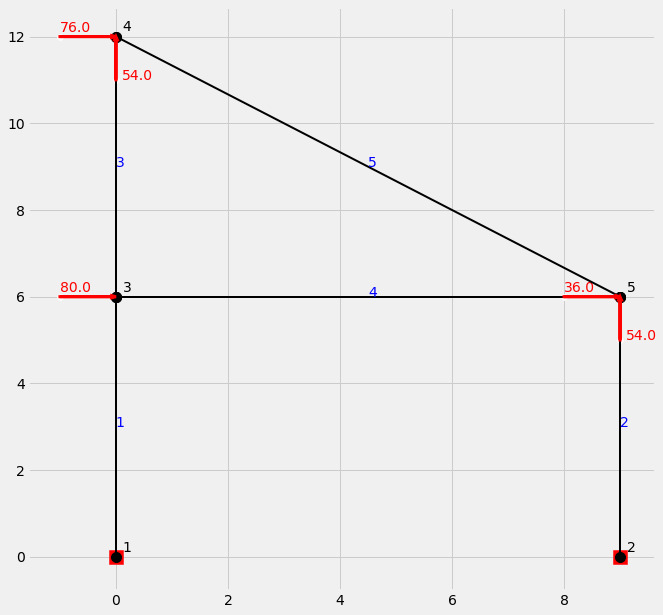

In [8]:
Frame_3.Draw_Frame_Setup(figure_size=[10,10], arrow_line_width=3)

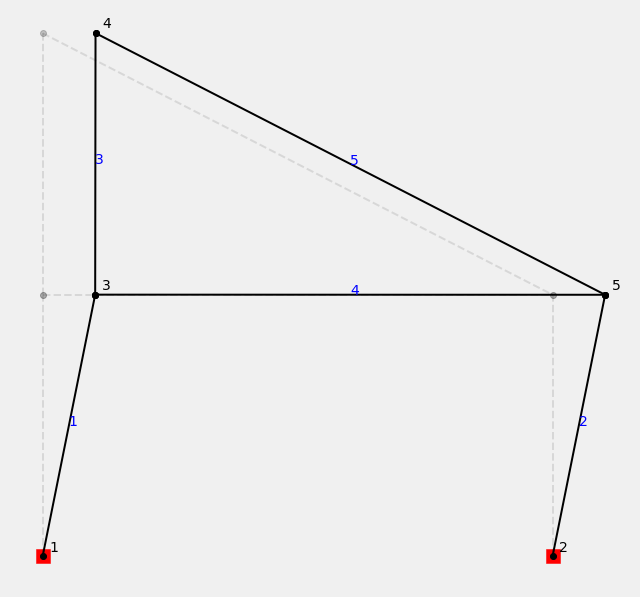

In [9]:
Frame_3.Draw_Frame_Displacements(figure_size = [10,10], magnification_factor=5)

In [10]:
Frame_3.reactions_

{1: [-106.05122, -157.02711, 360.44137], 2: [-85.94878, 49.02711, 320.31469]}

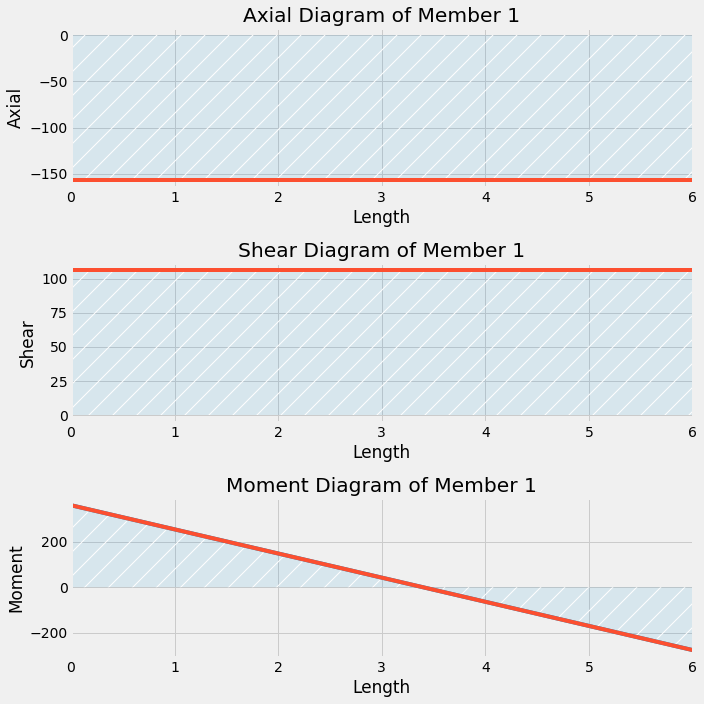

In [11]:
M1.Plot_Diagrams()

In [12]:
M1.Summary()

At Left End:
Axial: -157.02710518672995
Shear: 106.05122291709338
Moment: 360.4413680446755

At Right End:
Axial: -157.02710518672995
Shear: 106.05122291709338
Moment: -275.86596945788483

Minimum and Maximum
Minimum Shear: 106.05122291709338
Maximum Shear: 106.05122291709338
Minimum Moment: -275.86596945788483
Maximum Moment: 360.4413680446755


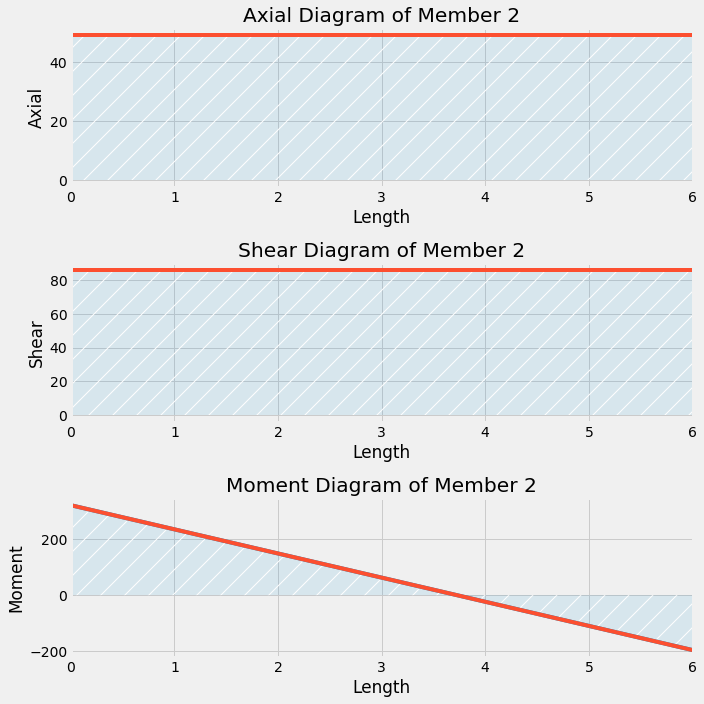

In [13]:
M2.Plot_Diagrams()

In [14]:
M2.Summary()

At Left End:
Axial: 49.027105186730516
Shear: 85.94877708290389
Moment: 320.3146852747452

At Right End:
Axial: 49.027105186730516
Shear: 85.94877708290389
Moment: -195.37797722267806

Minimum and Maximum
Minimum Shear: 85.94877708290389
Maximum Shear: 85.94877708290389
Minimum Moment: -195.37797722267806
Maximum Moment: 320.3146852747452


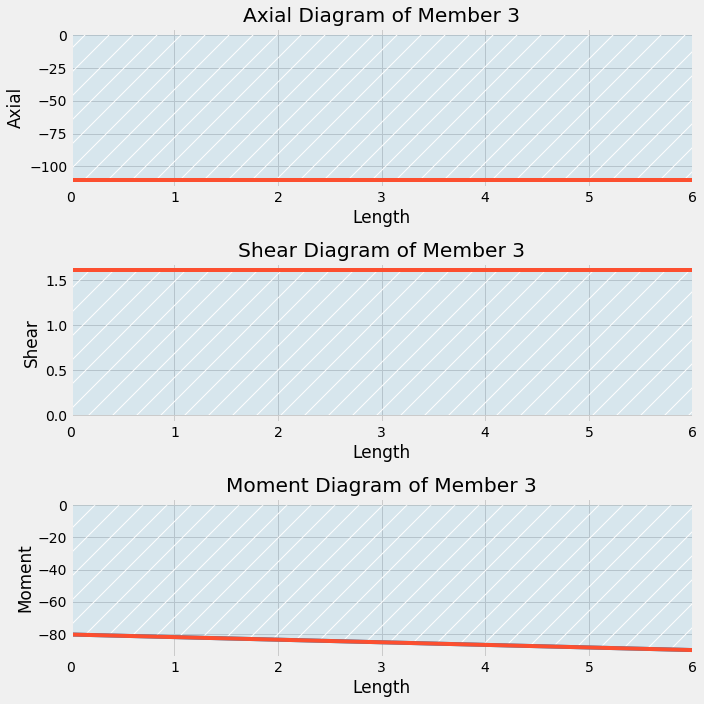

In [15]:
M3.Plot_Diagrams()

In [16]:
M3.Summary()

At Left End:
Axial: -110.59910587897298
Shear: 1.6109421518677323
Moment: -80.39374239473682

At Right End:
Axial: -110.59910587897298
Shear: 1.6109421518677323
Moment: -90.05939530594321

Minimum and Maximum
Minimum Shear: 1.6109421518677323
Maximum Shear: 1.6109421518677323
Minimum Moment: -90.05939530594321
Maximum Moment: -80.39374239473682


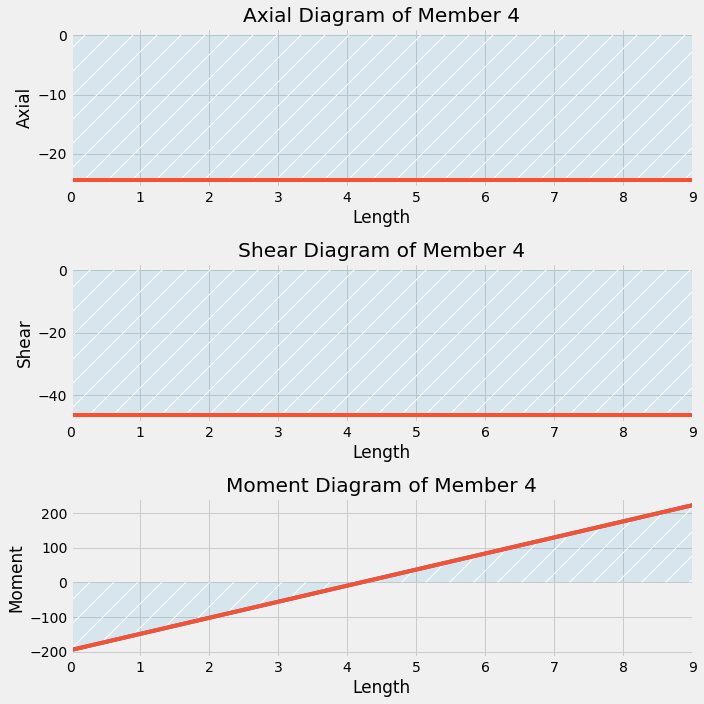

In [17]:
M4.Plot_Diagrams()

In [18]:
M4.Summary()

At Left End:
Axial: -24.440280765214993
Shear: -46.42799930775704
Moment: -195.47222706314793

At Right End:
Axial: -24.440280765214993
Shear: -46.42799930775704
Moment: 222.37976670666544

Minimum and Maximum
Minimum Shear: -46.42799930775704
Maximum Shear: -46.42799930775704
Minimum Moment: -195.47222706314793
Maximum Moment: 222.37976670666544


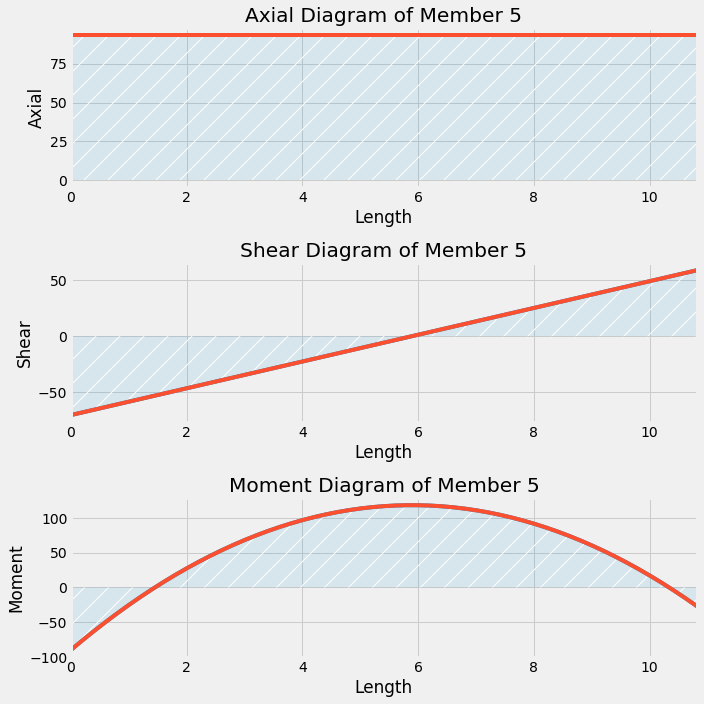

In [19]:
M5.Plot_Diagrams()

In [20]:
M5.Summary()

At Left End:
Axial: 93.29097261530478
Shear: -70.72960067884046
Moment: -90.05939530594318

At Right End:
Axial: 93.29097261530478
Shear: 59.070245237863155
Moment: -27.00178948398758

Minimum and Maximum
Minimum Shear: -70.72960067884046
Maximum Shear: 59.070245237863155
Minimum Moment: -90.05939530594318
Maximum Moment: 118.34191152436628
